<a href="https://colab.research.google.com/github/mrunaliyadav003/Twitter-Trolls-Identification/blob/main/Twitter_trolls_identification_during_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hate Speech and Troll Analysis on Twitter
<hr />
<hr />

# Introduction

"*Fake news spreads 6 times faster on Social Media*". A line from the recent Netflix special "*The Social Dilemma*" that caught my attention. The social media, the likes of Twitter,Facebook etc, has a fair share of opinionated, silent consumers, trolls, objective individuals, hate mongerers and the list never ends. This notebook is an attempt to understand the various aspects of these tweets. The Notebook also attempts to explore the hypothesis of genuinity and the legitimacy of these tweets by understanding various parameters like User location, Verified users, number of followers, friends, favorites, number of retweets and several other parameters.

<hr />

# Methodology

The Noteook is segmented broadly into 2 sections of Exploratory Data Analysis (EDA):
1. Univariate Exploratory Analysis
2. Mutlivariate Exploratory Analysis

<hr />

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #base plotting library for plotly
from matplotlib.pyplot import figure # to set the figure size
import plotly.express as px #plotly library to produce plots
from wordcloud import WordCloud, ImageColorGenerator #wordcloud library
from nltk.tokenize import word_tokenize #word tokenizer
from nltk.probability import FreqDist # Frequency Distributor
from nltk.corpus import stopwords #stop words for data cleaning


Let's begin by reading the data into a dataframe by summoning our good old friend Pandas(Ofcourse :))

In [2]:
data = pd.read_csv("/content/covid19_tweets.csv")

Lets see how the data looks like and the shape of the dataset.

In [3]:
print("The dataset has {} rows and {} columns".format(data.shape[0],data.shape[1]))
data.head()

The dataset has 179108 rows and 13 columns


user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

The Data Type of each column using the `dtype` utility method pandas. This will give us a clear indication of the kind of data present in the dataset and that which could potentially lead to type casting to the underlying datatype value for further processing.

In [4]:
print("------------------------------------------------------------------------------------------------------------")
print("The Datatype of each column in the dataset.\n\n")
print(data.dtypes)
print("------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------
The Datatype of each column in the dataset.


user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object
------------------------------------------------------------------------------------------------------------


From the list of datatype of each column, there are 3 columns which are of integer type. As part of Preliminary Analysis, meaningful insights can be drawn on the integer valued columns by implementing a **Generative Descriptive statistics** on them.

In [5]:
print("------------------------------------------------------------------------------------------------------------")
print("The Descriptive Statistics of the Dataset.\n\n")
print(data.describe())
print("------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------
The Descriptive Statistics of the Dataset.


       user_followers   user_friends  user_favourites
count    1.791080e+05  179108.000000     1.791080e+05
mean     1.090555e+05    2121.701566     1.444411e+04
std      8.414670e+05    9162.553072     4.452270e+04
min      0.000000e+00       0.000000     0.000000e+00
25%      1.720000e+02     148.000000     2.060000e+02
50%      9.920000e+02     542.000000     1.791000e+03
75%      5.284000e+03    1725.250000     9.388000e+03
max      4.944256e+07  497363.000000     2.047197e+06
------------------------------------------------------------------------------------------------------------


## Univariate Analysis

Lets Get started with Univariate Analysis of the Dataset.

In this section, we will go through each of the variables/columns in the dataset and understand some basic information like:

* Distribution of column values across the dataset.
* Outlier Detection
* Number of Null values.
* Number of Unique values.
* Aggregation(wherever necessary)

### 1. user_location

Let us start with the number of unique places in the dataset.

In [6]:
print("Total number of Unique locations: ",data["user_location"].nunique())

Total number of Unique locations:  26920


Let us now see the distribution of locations in all the tweets

In [7]:
print("------------------------------------------------------------------------------------------------------------")
print("Number of tweets for each of the unique location in the dataset.\n\n")
print(data["user_location"].value_counts())
print("------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------
Number of tweets for each of the unique location in the dataset.


India                         3741
United States                 2455
New Delhi, India              1721
Mumbai, India                 1401
Washington, DC                1354
                              ... 
Crystal Lake, IL                 1
Johnstown, PA                    1
A little east of LAX...          1
#Ireland                         1
Aliwal North, South Africa       1
Name: user_location, Length: 26920, dtype: int64
------------------------------------------------------------------------------------------------------------


Let us see if there are null values in this particular column

In [8]:
print("The number of tweets where the user location is unkown: ", data["user_location"].isna().sum())

The number of tweets where the user location is unkown:  36771


Storing the value counts into a dataframe for plotting the distribution of the user location counts

In [9]:
user_location_df = data["user_location"].value_counts().rename_axis("place").reset_index(name="counts")
user_location_df.head()

place  counts
0             India    3741
1     United States    2455
2  New Delhi, India    1721
3     Mumbai, India    1401
4    Washington, DC    1354

In [10]:
user_location_threshold_data = user_location_df[user_location_df["counts"]>25].head(50)

fig = px.bar(user_location_threshold_data,x="place",y="counts", title="Top 50 Locations tweets originate from")
fig.show()

We could record the steps carried out for univariate preliminary analysis into a function. The `inspect_column` method will gather the basic information of a particular column and display the graphical findings.

In [11]:
def inspect_column(data,column):
    print("------------------------------------------------------------------------------------------------------------")
    print("Basic Preliminary Information of column '{}'\n\n".format(column))
    print("Total number of Unique ",column,"values: ",data[column].nunique())
    print("----Quick overview of the distribution of the variable------")
    print(data[column].value_counts())
    print("The number of tweets where the ", column ,"specific data is unkown : ", data[column].isna().sum())
    sub_data_df = data[column].value_counts().rename_axis(column).reset_index(name="counts")
    sub_data_threshold_df = sub_data_df[sub_data_df["counts"]>25].head(100)
    fig = px.bar(sub_data_threshold_df,x=column,y="counts", title="Distribution of values of column '{}'".format(column))
    fig.show()

### 2. user_verified

In [12]:
inspect_column(data,"user_verified")

------------------------------------------------------------------------------------------------------------
Basic Preliminary Information of column 'user_verified'


Total number of Unique  user_verified values:  2
----Quick overview of the distribution of the variable------
False    156013
True      23095
Name: user_verified, dtype: int64
The number of tweets where the  user_verified specific data is unkown :  0


So there are no null values in the `user_verified` column. Also what's interesting to note is that there are 7 times as many **unverified** accounts as verified accounts putting out information/opinion during the pandemic season. This should potentially raise concerns on the legitimacy of the information contained in these tweets as most of the information is emanating from unverified sources.

### 3. hashtags

In [13]:
inspect_column(data,"hashtags")

------------------------------------------------------------------------------------------------------------
Basic Preliminary Information of column 'hashtags'


Total number of Unique  hashtags values:  52640
----Quick overview of the distribution of the variable------
['COVID19']                                                               37792
['Covid19']                                                                4834
['covid19']                                                                3124
['coronavirus', 'CoronaVirusUpdate', 'COVID19', 'CoronavirusPandemic']      624
['coronavirus']                                                             550
                                                                          ...  
['changemaker', 'masks', 'womenempowerment']                                  1
['COVID19', 'Scotland', 'theNational']                                        1
['afternoonagenda', 'COVID19']                                                1
['Spain',

In [14]:
# A small method that cleans up the hashtags and collates all the hashtags into a list.
all_hashtag_list = []

# Itertuples is much faster than iterrows
for each_row in data.itertuples():
    if not str(each_row.hashtags).lower() == "nan":
        each_hashtag = str(each_row.hashtags)
        each_hashtag = each_hashtag.strip('[]').replace("'","")
        all_hashtag_list += each_hashtag.split(",")

print("Total number of hashtags",len(all_hashtag_list))

Total number of hashtags 265994


Converting the list of values into a Dataframe to leverage the dataframe utility methods to carry out further analysis.

In [15]:
hashtag_df = pd.DataFrame(all_hashtag_list,columns=["hashtags"])
hashtag_df.head()

hashtags
0             COVID19
1             COVID19
2  CoronaVirusUpdates
3             COVID19
4         coronavirus

Let us use the `value_counts` to get the individual counts of each of the hastags

In [16]:
count_df = hashtag_df["hashtags"].value_counts().rename_axis("hashtags").reset_index(name="counts")
count_df.head()

hashtags  counts
0   COVID19   52684
1   COVID19   27757
2   Covid19    6935
3   covid19    5182
4   covid19    4022

But, is it totally cleaned ? If not all the hastags, atleast the COVID related hastags ? The answer is NO. we can still see duplicate counts and entries for the same covid19 hashtag. We need to minimise this repition and bring it down to a smaller number of varying versions of the COVID hashtag. The below code cell, simply adds the count values of the COVID related hastags.

In [17]:
hashtag_final_count_dic = {}
for each_row in count_df.itertuples():
    if str(each_row.hashtags).strip().lower() == "covid19":
        if "covid19" not in hashtag_final_count_dic:
            hashtag_final_count_dic["covid19"] = each_row.counts
        else:
            hashtag_final_count_dic["covid19"] += each_row.counts
    else:
        hashtag_final_count_dic[str(each_row.hashtags).strip()] = each_row.counts

print("The aggregated hashtags count has {} hashtags".format(len(hashtag_final_count_dic)))

The aggregated hashtags count has 44007 hashtags


Lets get this into a dataframe as well.

In [18]:
final_hashtag_count_df = pd.DataFrame(hashtag_final_count_dic.items(),columns=['hashtag','count'])
final_hashtag_count_df

hashtag   count
0                  covid19  100312
1              coronavirus    3251
2              Coronavirus    1197
3                 pandemic     241
4      CoronavirusPandemic      48
...                    ...     ...
44002         hospitalised       1
44003      virtualtownhall       1
44004           foodpantry       1
44005             newneeds       1
44006    KeepTeachersAlive       1

[44007 rows x 2 columns]

We were able to drill down and aggregate most of the covid19 hashtags and we now have the cummulated sum of the number of tweets with covid19 hashtags. Let us now see the top 10 tweets with highest number of hashtags.

In [19]:
final_df = final_hashtag_count_df.sort_values(by='count',ascending=False).head(10)
fig = px.bar(final_df,"hashtag","count",title="Top 10 used hashtags during the pandemic")
fig.show()

No surprises here the hashtag `#covid19` has been used over 100K times.  

### Analyzing numerical columns in the dataset



## 4. user_followers

Let us perform analysis on the distribution of user followers for each twitter handle.

In [20]:
fig = px.box(data,y="user_followers", title="The overall distribution of user followers")
fig.show()

Looks like the distribution of the users is fairly right skewed with IQR(Inter Quartile Range) being between 172 to 5K user followes. Closing down on the upper and lower limit whiskers will give us a better sense of the distribution of the users. We can alse see that there are significant outliers in terms of followers to the overall set of users. The median number of followers however, is around `992` users.

Let us cut the whiskers on either end to see how the distribution looks like.

In [21]:
fig = px.box(data[(data["user_followers"]>0) & (data["user_followers"]<=15000)],y="user_followers",title="The distribution of User followers within 15000 user followers")
fig.show()

The IQR does shift a bit more towards the right. However, the overall distribution still looks heavily right skewed with many outliers considering the fence values and IQR values. However in this case, there are too many values outside the deemed area to be termed as outliers. These values can add extra value to the analysis. We keep them as it is for now.

Let us see how the distribtion looks like on a histogram.

In [22]:
fig = px.histogram(data[(data["user_followers"]>0) & (data["user_followers"]<=15000)],x="user_followers", nbins=10, color_discrete_sequence=["red"],
                   title="Distribution of user followers with user followers less than 15000")
fig.show()

We can see that the highest number of followers for a twitter handle/user, lie within the range of 0 to 2000. The number of followers keep descreasing with the increase in the number of followers. So to put it simply, majority of the twitter users have followers in the range upto 2000.

We perform the same actions for the remaining 2 numerical columns `user_friends` and `user_favourites`

## 5. user_friends

In [23]:
fig = px.box(data,y="user_friends")
fig.show()

The boxplot for `user_friends` shows similar properties to that of `user_followers`. The distribution looks extremely right skewed with IQR roughly ranging between 100+ to 1.7K. let us do the same operations to this column as well to see the effects of limiting the number of user friends.

In [24]:
fig = px.box(data[(data["user_friends"]>0) & (data["user_friends"]<=5000)],y="user_friends", title="Distribution of user friends with user friends less than 5k")
fig.show()

In [25]:
fig = px.histogram(data[(data["user_friends"]>0) & (data["user_friends"]<=5000)],x="user_friends", nbins=10, color_discrete_sequence=["red"],
                  title="Distribution of user friends less than 5K")
fig.show()

We can see that the majority of users have a maximum of 500 followers. Let us now explore user_favorites and see if it has similar characteristics

## 6. user_favourites

In [26]:
fig = px.box(data,y="user_favourites",title="Distribution of user favourites")
fig.show()

The traits are very similar to the above 2 columns with identical distribution. Let us reduce the scope and try and understand it better.

In [27]:
fig = px.box(data[(data["user_favourites"]>0) & (data["user_favourites"]<=25000)],y="user_favourites",title="Distribution of user favourites with a maximum of 25K")
fig.show()

In [28]:
fig = px.histogram(data[(data["user_favourites"]>0) & (data["user_favourites"]<=25000)],x="user_favourites", nbins=10, color_discrete_sequence=["red"],
                  title="Distribution of user favorites with a maximum of 25k user favorites")
fig.show()

We can see that the highest number of user_favourites are for the users with user_favorites between the range of 0-5000.

## 7. source

Let us now understand the different types of sources twitterati made use to make them tweets. We will later examine the variation in the usage of different kinds of sources with other variables like user_location and such.

In [29]:
count_df = data["source"].value_counts().rename_axis("source").reset_index(name="counts")
count_df

source  counts
0              Twitter Web App   56891
1          Twitter for Android   40179
2           Twitter for iPhone   35472
3                    TweetDeck    8543
4               Hootsuite Inc.    7321
..                         ...     ...
605                DataBlogger       1
606             Dear_Assistant       1
607                OnlyPultCom       1
608  Washington Square Parkerz       1
609          Radiology: AI app       1

[610 rows x 2 columns]

We can see that sources across the spectrum are made use to desseminate information and opinion. `Twitter Web App`, `Twitter For Android`, `Twitter for iPhone` and `TweetDeck` are some of the most commonly used sources to make tweets from all over the world.

We will just be seeing the variation and distribution of the top 10 sources for better understanding and convenience.

In [30]:
fig = px.bar(count_df.head(10), x='source', y='counts',title="Top 10 Sources to make tweets")
fig.show()

## 8. is_retweet

This variable indicates whether a particular tweet was retweeted or not. Let us continue the exploration

In [31]:
count_df = data["is_retweet"].value_counts()
count_df

False    179108
Name: is_retweet, dtype: int64

Intersting! Looks like none of the tweets were retweeted. let us confirm this by finding unique values in this variable

In [32]:
print("There are {} unique values in the column 'is_retweet'".format(data["is_retweet"].nunique()))

There are 1 unique values in the column 'is_retweet'


Yes. None of the tweets have been retweeted. This is really interesting considering how rampantly tweets are shared and retweeted.

## 9. date

Let us perform time series analysis and understand the trends with respect to the duration of the tweets made.

The `date` column is of object datatype. We need to type cast into Date type for further analysis.

In [33]:
# converting to Date type
data["date"] = pd.to_datetime(data["date"])

In [34]:
print("Date column is of '{}' type".format(data["date"].dtype))
data["date"].head()

Date column is of 'datetime64[ns]' type


0   2020-07-25 12:27:21
1   2020-07-25 12:27:17
2   2020-07-25 12:27:14
3   2020-07-25 12:27:10
4   2020-07-25 12:27:08
Name: date, dtype: datetime64[ns]

Let us analyse the distribution of tweets per day. Let us start by adding a new column `day_of_tweet` which will only have the date part of the tweet made. This will prove convenient while aggregating values with respect to dates.

In [35]:
data["day_of_tweet"] = pd.to_datetime(data['date']).dt.date
data["day_of_tweet"].head()

0    2020-07-25
1    2020-07-25
2    2020-07-25
3    2020-07-25
4    2020-07-25
Name: day_of_tweet, dtype: object

Once we have only the dates without the timestamps, let us perform aggregation and record the number of tweets made per day.

In [36]:
date_time_series = data.groupby("day_of_tweet").size().rename_axis("day_of_tweet").reset_index(name="number_of_tweets")
date_time_series

day_of_tweet  number_of_tweets
0    2020-07-24               295
1    2020-07-25             16881
2    2020-07-26              7500
3    2020-07-27              7500
4    2020-07-28              7500
5    2020-07-29              2780
6    2020-07-30              1980
7    2020-07-31              7500
8    2020-08-01              7500
9    2020-08-02              7500
10   2020-08-04              7500
11   2020-08-06              7214
12   2020-08-07              1060
13   2020-08-08              7500
14   2020-08-09              7500
15   2020-08-10              4891
16   2020-08-11              7500
17   2020-08-12              7500
18   2020-08-13              7500
19   2020-08-14              7500
20   2020-08-16              7500
21   2020-08-17              7500
22   2020-08-18              7500
23   2020-08-22             11555
24   2020-08-29              4077
25   2020-08-30              8375

We now have the number of tweets made per day from 24th July to 30th August. Its time plot a time series of this data.

In [37]:
fig = px.line(date_time_series, x='day_of_tweet', y="number_of_tweets", title="Time series for number of tweets made per day")
fig.show()

We can observe some periodicity in terms of peaks and troughs of interest shown by people in terms of number of tweets made. Given the bulk of hashtags made in relation to COVID19, it would be safe to assume that majority of the tweets would have been made in relation the same topic.

## 10. text

Finally its time to analyse and explore the tweet itself. We will be performing primitive NLP techniques in the following order:

- Tokenization
- Removal of Stop Words
- Finding the highest occuring words across the corpus
- Graphical representation of the same using a wordcloud and Frequency distribution.

Lets get Started !


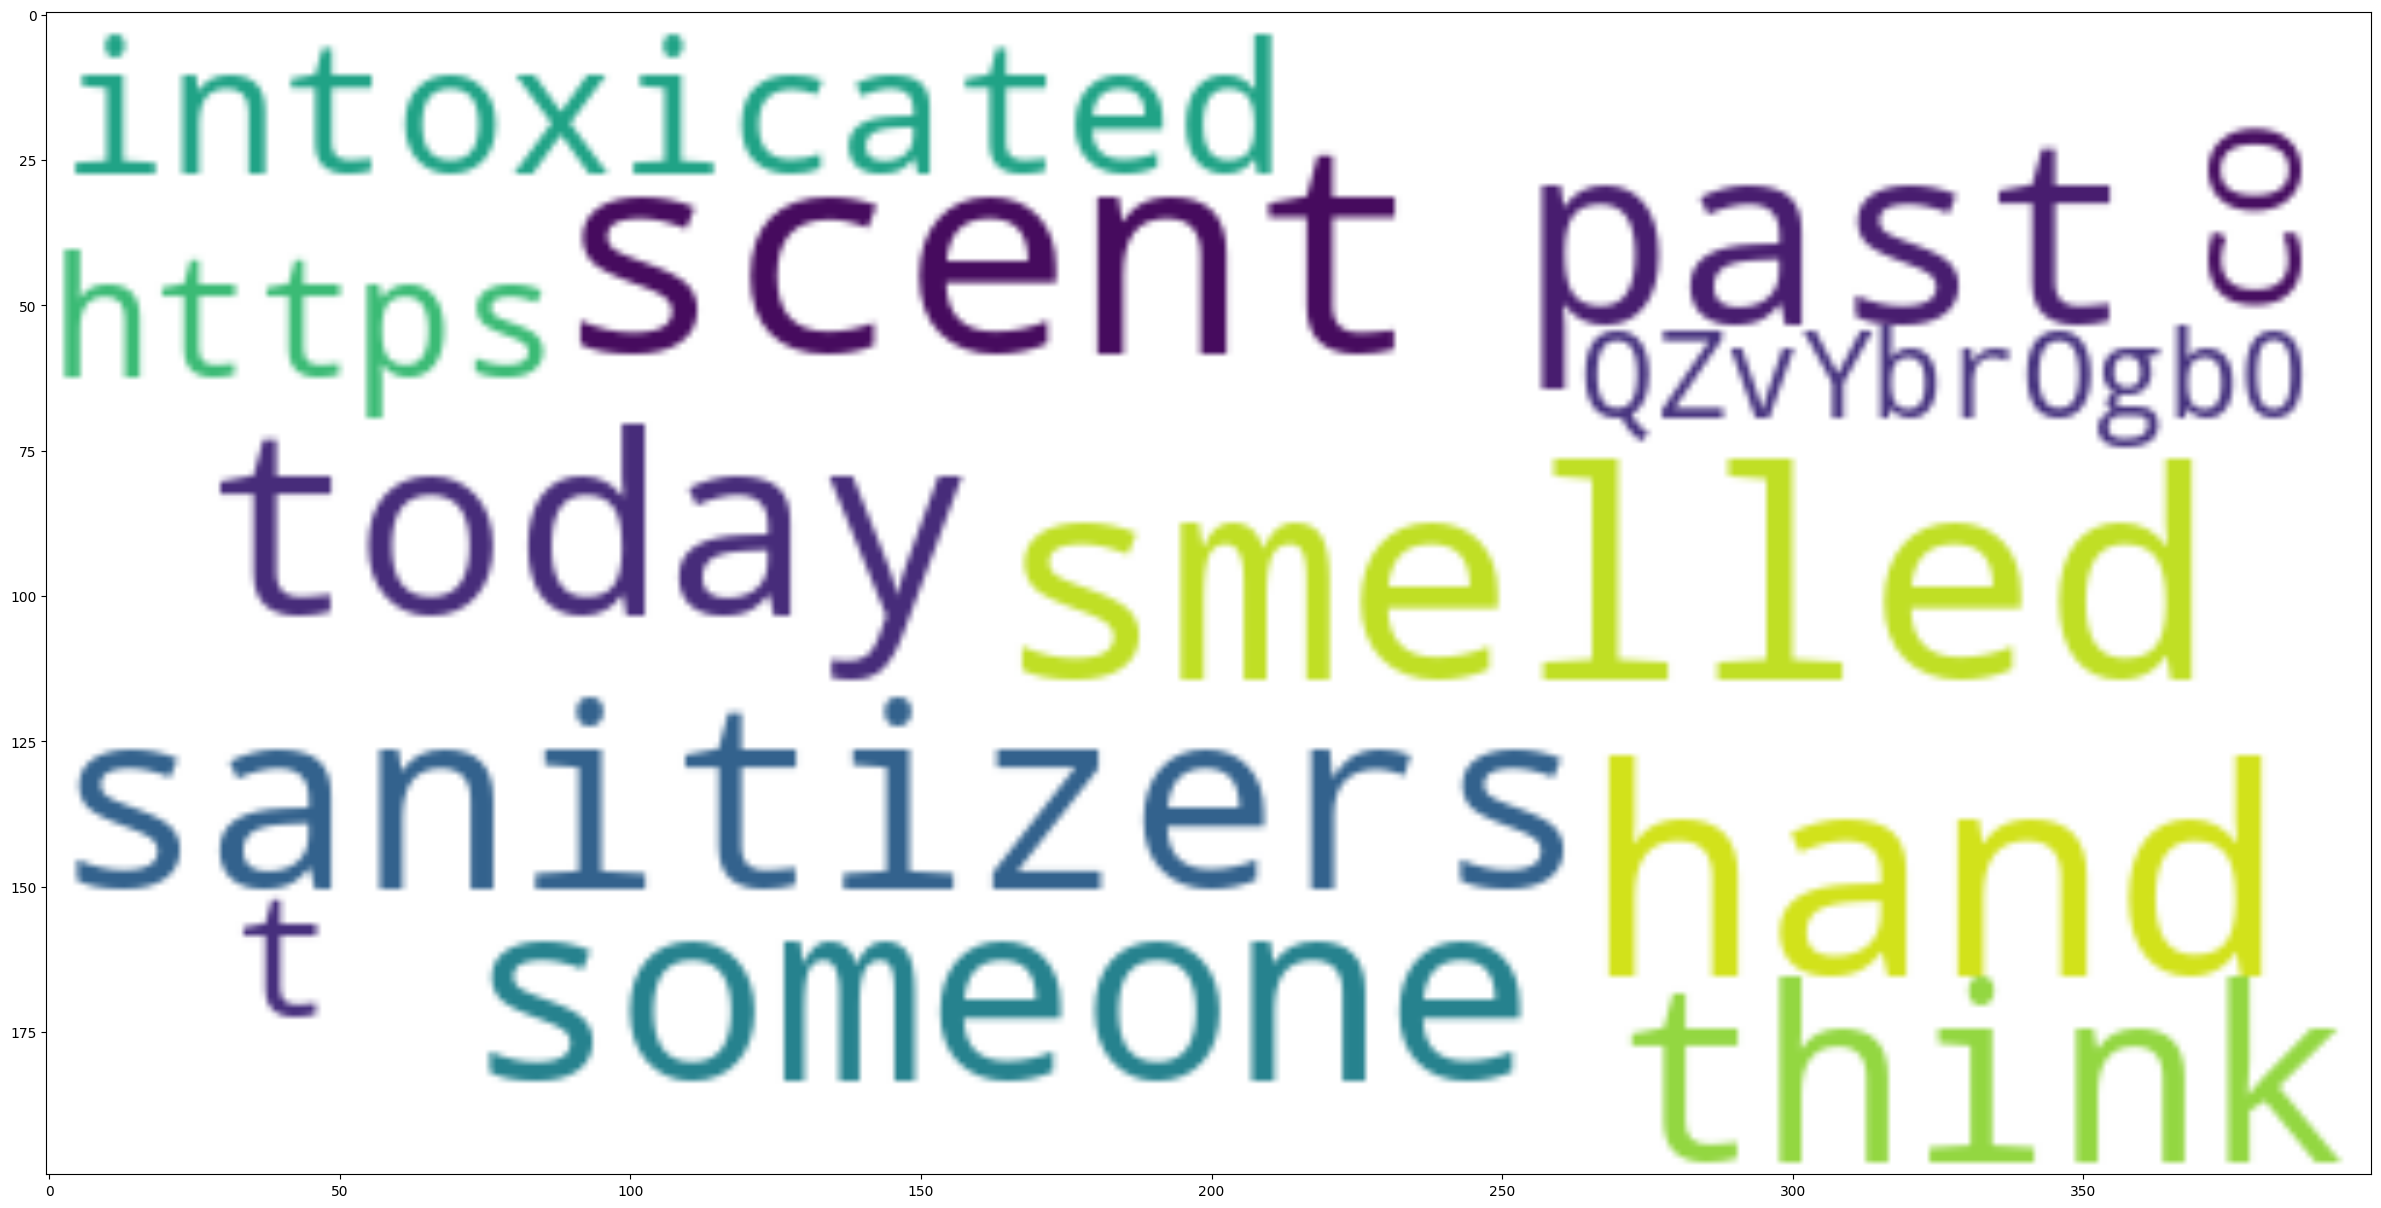

In [39]:
# Plotting a really simple wordcloud of only the first tweet
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(data.text[0])
plt.figure(figsize=(30,30))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("on")
plt.show()

In [43]:
# Lets gather all the tweet data into a variable.
final_text = "".join(each_text for each_text in data.text)
print ("There are {} words overall in tweets".format(len(final_text)))

There are 23376746 words overall in tweets


In [ ]:
#lets first tokenize the entire corpus
tokenized_words = word_tokenize(final_text)
print("The size of the tokenized words in the corpus is of size {}".format(len(tokenized_words)))

Lets see some Frequency Distribution of the words

In [ ]:
fdist = FreqDist(tokenized_words)
print(fdist)
# lets see the top 50 most frequently used words
fdist.most_common(50)

We can see a lot of garbage characters and stop words. Let us see how these are distrubuted anyway

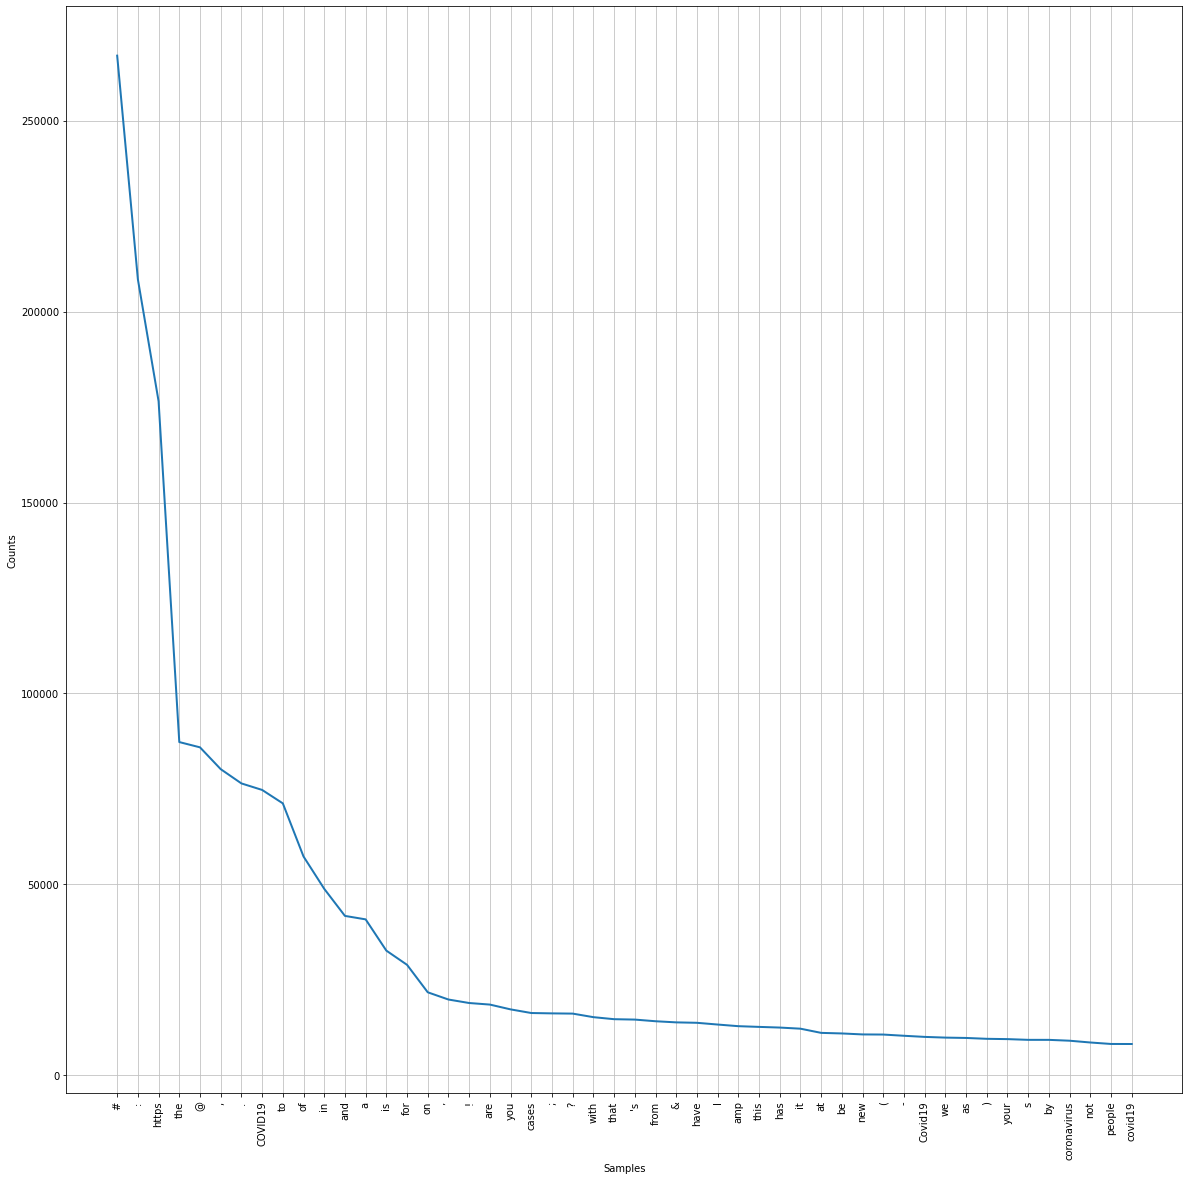

In [ ]:
# plotting the top 50 words in the frequency distribution
plt.figure(figsize=(20,20))
fdist.plot(50)
plt.show()

we can see that there are a lot of punctuation words in the corpus. Lets first get rid of them.

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenized_words = tokenizer.tokenize(final_text)

We can see that a lot of words do not show substantail meaning. These are Stop words. Which are basically considered as noise. Words like is, am, are, this, a, an, the, etc.

In [ ]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'very', 'herself', 'our', 'do', 'not', 'up', "weren't", "aren't", "she's", 'if', 'of', 'mightn', "shouldn't", 'were', 'i', 'here', 'hadn', 'such', 'isn', 'll', 'some', 'before', 'did', 'mustn', 'yourself', 'ours', 'over', 'all', 'too', 'again', 've', 'being', 'himself', "don't", 'to', 'once', 'which', 're', 'has', 'in', 'why', 'shouldn', 'them', 'don', 'few', 'aren', 'this', "you've", 'at', 'their', 'they', "hasn't", 'me', "couldn't", 'other', 'didn', 'so', 'hers', 'where', 'was', 'against', 'itself', 'themselves', "that'll", 'than', 'be', "needn't", 'when', 'him', 'after', 'or', 'yourselves', 's', 'doesn', 'these', 'couldn', 'o', 'his', 'we', 'had', 'each', 'with', 'am', 'whom', 'until', 'same', 'm', 'as', "mustn't", 'how', 'your', 'both', "you'd", 'he', 'those', 'her', 'only', 'been', 'can', 'ma', 'wasn', 'by', "it's", 'out', 'does', 'ourselves', 'doing', 'its', 'most', 'just', 'below', 'is', 'who', 'she', 'are', 'ain', 'yours', "you'll", 'needn', 'because', 'have', "wasn't", 'haven

In [ ]:
#removing stop words from our tweets
filtered_tokens = []
for each in tokenized_words:
    if (each not in stop_words) and (len(each) > 3):
        filtered_tokens.append(each)
print("Tokenised words now has {} words after removing stop words".format(len(filtered_tokens)))

Tokenised words now has 1953396 words after removing stop words


Lets replot the frequency distribution and see the most frequently used words in the dataset.

In [ ]:
fdist = FreqDist(filtered_tokens)
print(fdist)

<FreqDist with 330214 samples and 1953396 outcomes>


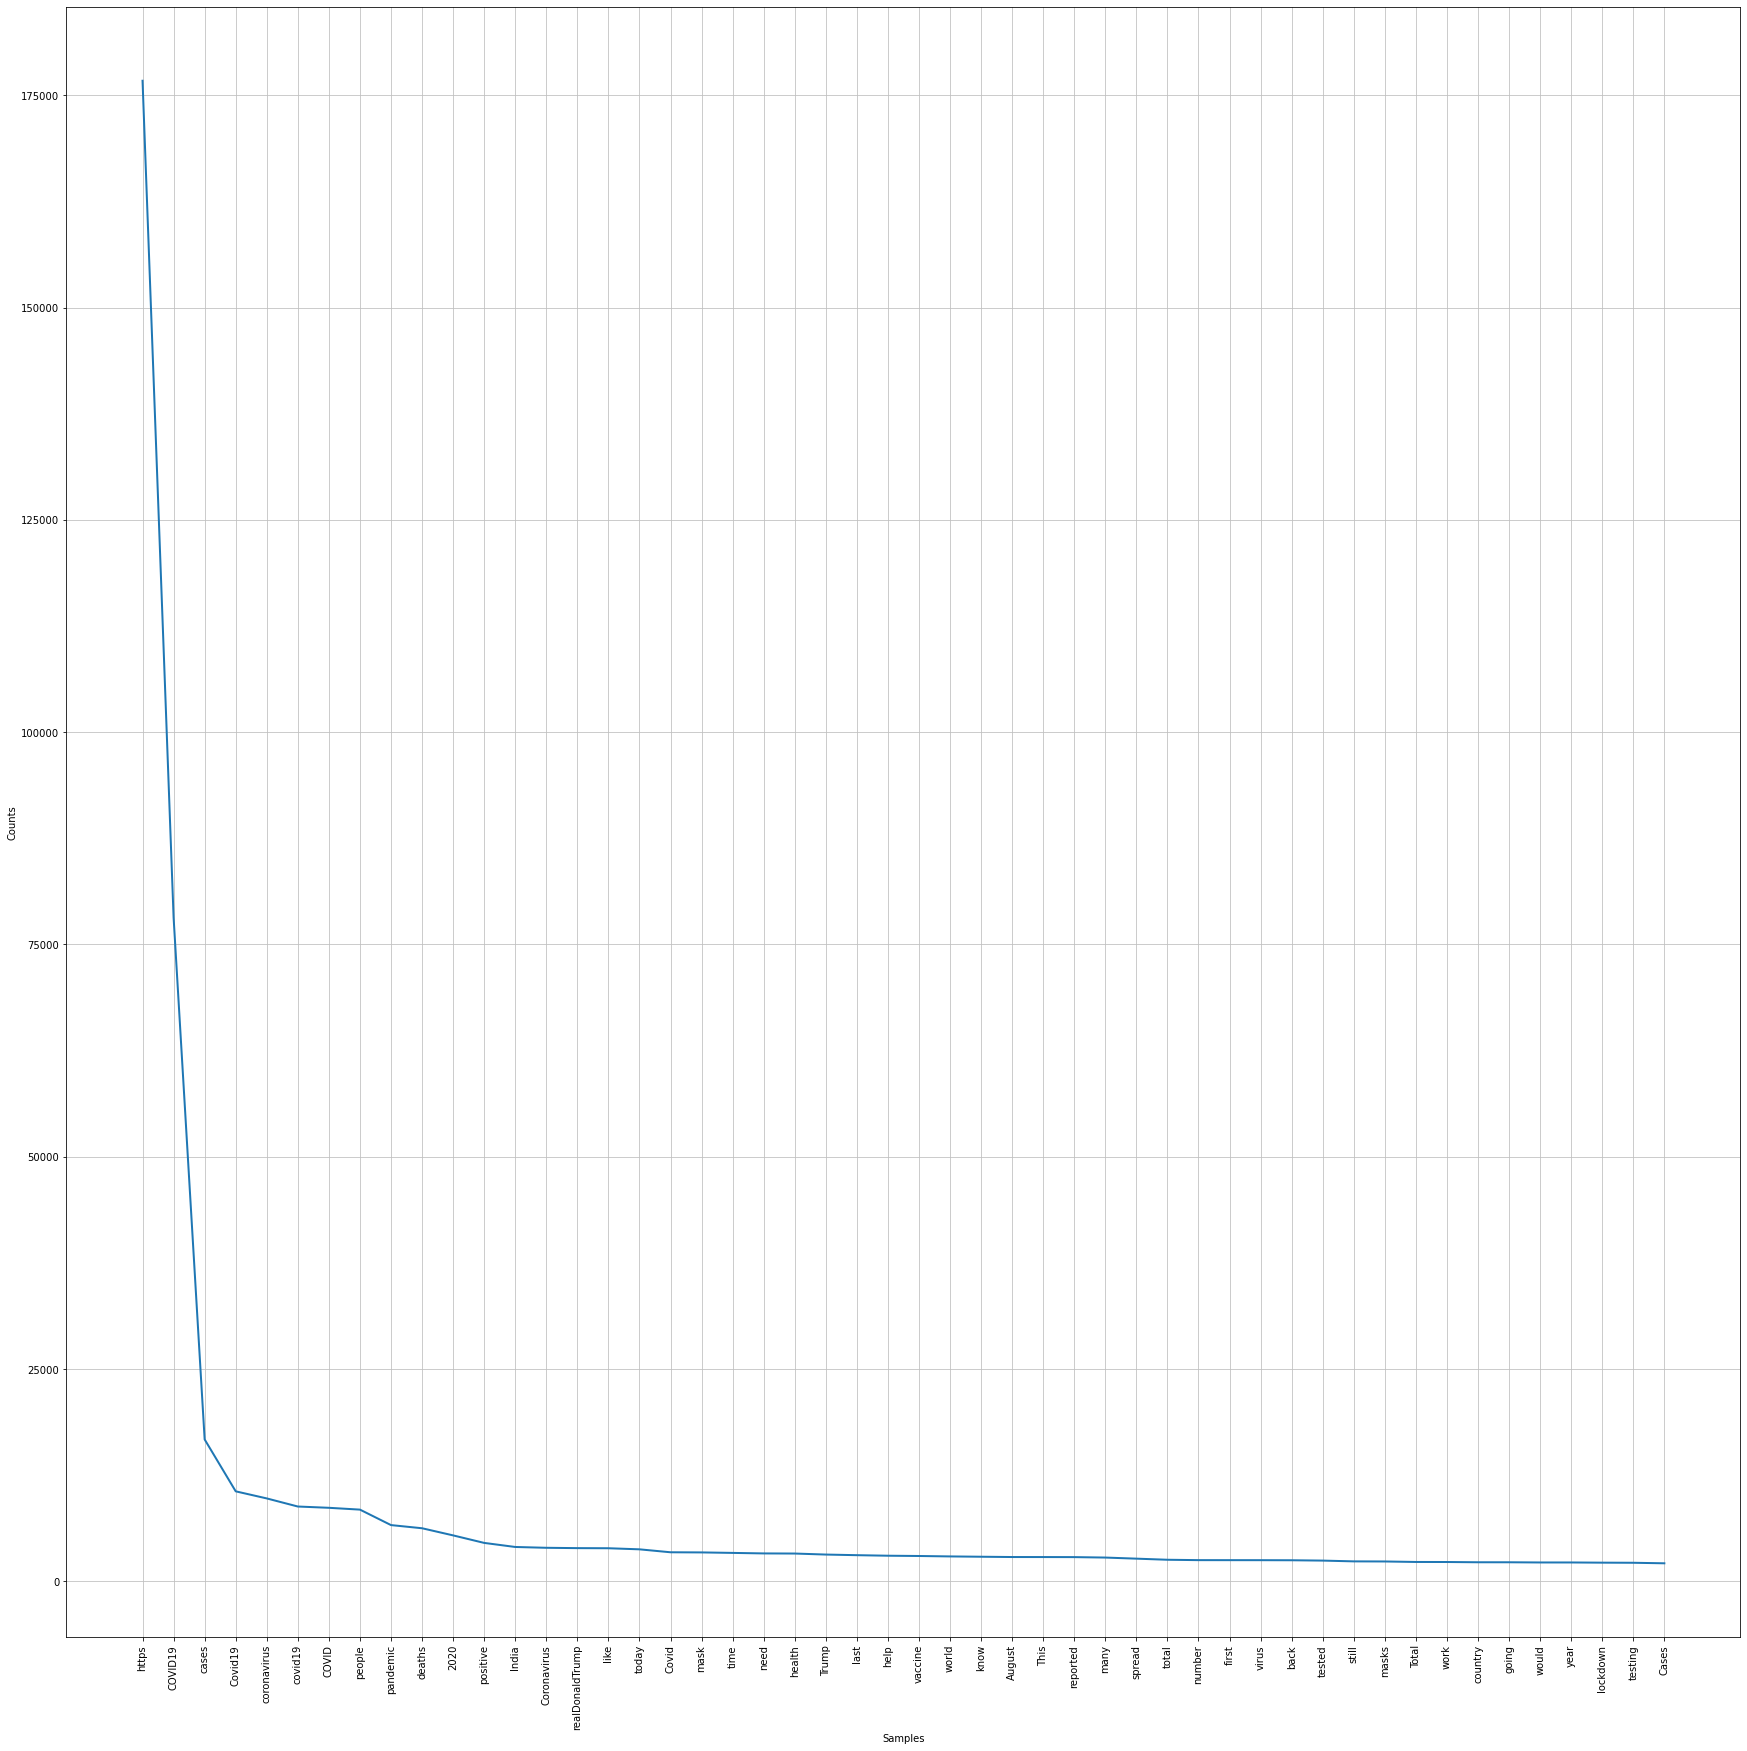

In [ ]:
plt.figure(figsize=(30,30))
fdist.plot(50)
plt.show()

Barring the most frequently used token `https` which on the first impression may seem a fairly non-consequential token, it does show that majority of the tweets do quote some sort of source that led to the information contained in the tweet. The other most commonly used words across the entire dataset are pretty indicative of the current situation. Some of the most commonly used words are : `COVID19`, `cases`, `people`, `pandemic`, `2020` and several others.

In [ ]:
#Combining the top 200 frequently used words in the dataset
analyse_str = " ".join([each[0] for each in fdist.most_common(200)])
print(analyse_str)

https COVID19 cases Covid19 coronavirus covid19 COVID people pandemic deaths 2020 positive India Coronavirus realDonaldTrump like today Covid mask time need health Trump last help vaccine world know August This reported many spread total number first virus back tested still masks Total work country going would year lockdown testing Cases even death says days home take tests test hours Health risk safe patients could state news July school make week think reports government daily care said since want What died face confirmed case Pandemic good public support Americans million right latest data schools keep much crisis children around wear rate must Deaths life social also response every News update students symptoms They kids China months business tally wearing really fight impact workers well stop look everyone long family taking That times community made working lives There person important countries part getting global corona next better best great Global report recovery high across 

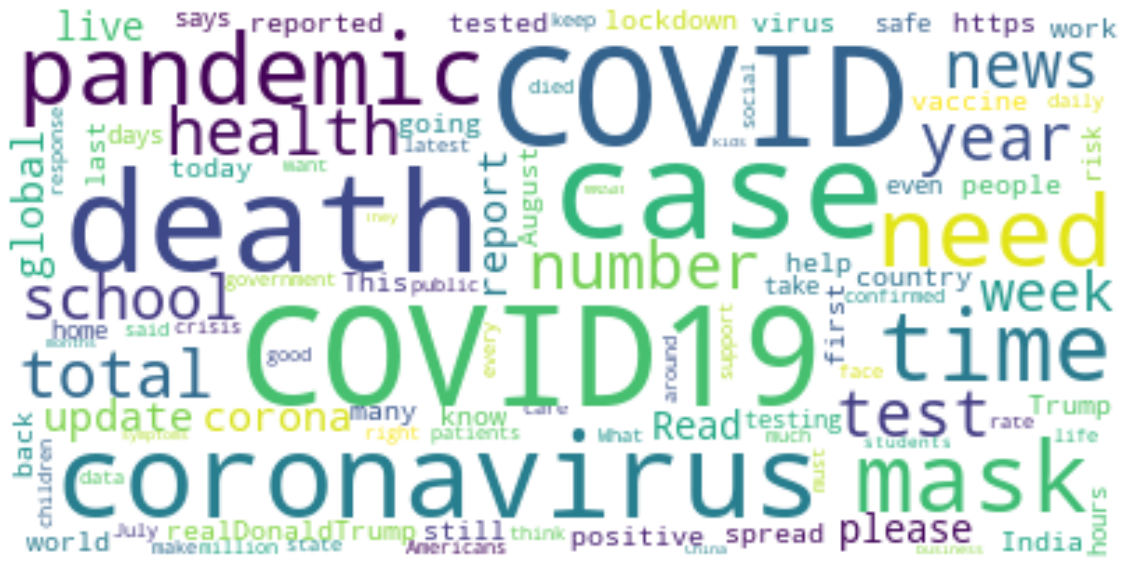

In [ ]:
# WordCloud for the most frequently used words across the dataset
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(analyse_str)
plt.figure(figsize=(20,20))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Amidst all the commotion and clamour on COVID, we see some politically atrributed and/or driven tweets as well. The words like `realDonaldTrump` and `trump` shows that twitter almost never runs out of gas when it comes to discussing politics.

-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


## Multi-Variate Exploratory Analysis

In this section, we will explore and understand the change caused by one of the variables on other variables. Mutlivariate analysis is a prominent technique to draw concrete insights into the behaviour of data.


Lets get started.

## 1. user location v/s account verification status.

In this section, we will see how the account verification status of the user making the tweet relates to the location. This will help us to understand what country/location has been making most of the tweets and how many of them are verified. Going back to our hypothesis of verification determining the genuinity of the information, we are trying to formulate which location potentially has high unverified news v/s verified information.

In [ ]:
# grouping by user_location and user_verified and gathering top 50 entries
user_loc_df = data.groupby(["user_location","user_verified"])["user_verified"].count().reset_index(name="count").sort_values(by=['count'], ascending=False).head(50)
user_loc_df.head()

user_location  user_verified  count
23839    United States          False   2385
10579            India          False   1912
10580            India           True   1829
13146  London, England          False   1199
23810   United Kingdom          False   1144

In [ ]:
# bar plot to show the user_location and count by user_verified
fig = px.bar(user_loc_df, x='user_location',y='count',color='user_verified',barmode="group",
            title="Relationship between the user locations v/s user verified")
fig.show()

We can see that United States has the most amount of unverified users. India on the other hand has fair amount of verified users. Does this say anything about the fake news narrative which often propogates media these days especially in the US? *Food for thought*

In [ ]:
fig = px.pie(user_loc_df, values='count', names='user_verified', title='Ratio of Verified acounts v/s Unverified accounts')
fig.show()

From an overall perspective, approximately 86% of user accounts are unverified and only about 14% of the user accounts verified. This is fairly a large skew leaning towards unverified accounts.

## 2. user_location v/s Hashtags

Analysing user location and hashtags will give us the insight into several different topics that are being talked about with different locations. This also, in a way, presents the overall mood of a particular location in relation to the topic at hand.

In [ ]:
# extracting the user location and their respective hashtags
user_loc_hastag_data = data[["user_location","hashtags"]]
user_loc_hastag_data.head()

user_location                           hashtags
0            astroworld                                NaN
1          New York, NY                                NaN
2      Pewee Valley, KY                        ['COVID19']
3  Stuck in the Middle                         ['COVID19']
4     Jammu and Kashmir  ['CoronaVirusUpdates', 'COVID19']

In [ ]:
# converting the dataframe to dictionary to aggregate by location
user_loc_hastag_data_dic = user_loc_hastag_data.to_dict(orient='records')
print("There are a total of {} records in the dictionary".format(len(user_loc_hastag_data_dic)))

There are a total of 179108 records in the dictionary


In [ ]:
# code block to perform string manipulation and extract location keys and aggregated values
cleaned_dic_container = []
for each in user_loc_hastag_data_dic:
    if str(each["user_location"]).lower() != 'nan' and str(each["hashtags"]).lower() != 'nan':
        cleaned_dic = {}
        each["hashtags"] = str(each["hashtags"]).strip('[]').replace("'","").split(",")
        cleaned_dic["user_location"] = str(each["user_location"])
        cleaned_dic["hashtags"] = each["hashtags"]
        cleaned_dic_container.append(cleaned_dic)
cleaned_dic_container[0:5]

[{'user_location': 'Pewee Valley, KY', 'hashtags': ['COVID19']},
 {'user_location': 'Stuck in the Middle ', 'hashtags': ['COVID19']},
 {'user_location': 'Jammu and Kashmir',
  'hashtags': ['CoronaVirusUpdates', ' COVID19']},
 {'user_location': 'Новоро́ссия', 'hashtags': ['coronavirus', ' covid19']},
 {'user_location': 'Gainesville, FL', 'hashtags': ['COVID19', ' Recruiting']}]

In [ ]:
# converting the processed list of dictionaries to a dataframe by using the 'explode' method of pandas to spread each of the 'hashtag' column entries vertically
user_loc_hashtags_df = pd.DataFrame(cleaned_dic_container)
user_loc_hashtags_df = user_loc_hashtags_df.explode('hashtags')
user_loc_hashtags_df

user_location            hashtags
0           Pewee Valley, KY             COVID19
1       Stuck in the Middle              COVID19
2          Jammu and Kashmir  CoronaVirusUpdates
2          Jammu and Kashmir             COVID19
3                Новоро́ссия         coronavirus
...                      ...                 ...
101965            Newton, NJ             schools
101966                  T.O.             covid19
101967       Ilorin, Nigeria           WearAMask
101968               Ontario             COVID19
101969         New York City             COVID19

[208215 rows x 2 columns]

In [ ]:
# applying final manipulations using lambda functions
hashtag_loc_df = user_loc_hashtags_df.groupby(['user_location',"hashtags"])["hashtags"].count().reset_index(name="count").sort_values(by=['count'], ascending=False).head(100)
hashtag_loc_df["user_location"] = hashtag_loc_df["user_location"].apply(lambda x : x.strip())
hashtag_loc_df["hashtags"] = hashtag_loc_df["hashtags"].apply(lambda x : x.strip())
hashtag_loc_df

user_location     hashtags  count
43618                    India      COVID19   1183
105221           United States      COVID19    844
70188         New Delhi, India      COVID19    682
42602                    India      COVID19    602
109220          Washington, DC      COVID19    524
...                        ...          ...    ...
12981              Bhubaneswar       Odisha     97
105570           United States      covid19     96
71233   New Orleans, Louisiana  photography     96
104381           United States  Coronavirus     95
43214                    India  coronavirus     95

[100 rows x 3 columns]

Let us see the most popular hastags aggregated by the user location.

In [ ]:
fig = px.bar(hashtag_loc_df,x = "user_location",y="count",color="hashtags",title="What are these countries talking about the most ?")
fig.show()

No surprises here. Majority of the users have been talking about COVID. However, we do get to see some some other hashtags as well. We can see `#auspoll` trending in the Canberra, Australia. Goes to show that despite the showstopper 'COVID', there are other pressing issues like elections, world is talking about.

## 3. user_location v/s tweet source

It would also be interesting to know the sources made use of to make tweets with the diverse demographics in the world. Lets give it a look. Also, seeing this with conjuction of the user_verified status should be really interesting to note. We can understand what source is predominantly used and how many of them are verified.

In [ ]:
# grouping by user location , user verified and the source. extracting the top 50 most commonly used sources where the users are verified.
user_loc_source_df = data.groupby(["user_location","user_verified","source"])["source"].count().reset_index(name="count").sort_values(by=['count'], ascending=False).head(50)
user_loc_source_df.head()

user_location  user_verified               source  count
15168          India           True      Twitter Web App   1017
34737  United States          False   Twitter for iPhone    741
15155          India          False  Twitter for Android    737
15153          India          False      Twitter Web App    716
35701      WORLDWIDE          False   GlobalPandemic.NET    679

In [ ]:
fig = px.bar(user_loc_source_df,x="user_location", y="count",color="source", facet_col="user_verified",title="Exploring the relationship between the user location v/s source of the tweet v/s user verification status")
fig.show()

We can see that most of the verified users make use of Twitter Web App and Tweet Deck(which is generally made use by users having multiple twitter accounts. eg. Media houses, etc.). Additionally, Twitter for Android is used as the source by most of the unverified accounts.

### 4. user verified v/s user followers

Given that we have established the already proven research results of the spread of fake news. And assuming for a minute, that verified accounts are less likely to propogate fake news, it would be interesting to find the median user followers against the verification status of an account. Ideally, we should have more followers for the verified account than the unverified accounts. But is that the case in reality ? Let us find out.

In [ ]:
# grouping by user verified status and finding the median user followers
user_ver_followers_df = data.groupby("user_verified")["user_followers"].median().reset_index(name="median_followers").sort_values(by=["median_followers"],ascending=False)
user_ver_followers_df

user_verified  median_followers
1           True             51546
0          False               642

In [ ]:
fig = px.pie(user_ver_followers_df, values="median_followers",names="user_verified",hole=.5, title="The proportion of Median number of followers between user verified accounts v/s unverified accounts")
fig.show()

We can see some skewed results favouring the user verified status. Perhaps, setting a particular threshold on the number of followers should give us a clearer picture. This is classic case of including outliers in the overall analysis.

## 5. user_verified v/s user friends

Following the same hypothesis of verified accounts and user followers. Let us find out if the same pattern holds for the median user friends for verified user.

In [ ]:
user_ver_friends_df = data.groupby("user_verified")["user_friends"].median().reset_index(name="median_friends").sort_values(by=["median_friends"],ascending=False)
user_ver_friends_df

user_verified  median_friends
0          False             544
1           True             529

In [ ]:
fig = px.pie(user_ver_friends_df, values="median_friends",names="user_verified",hole=.5, title="The proportion of Median number of friends between user verified accounts v/s unverified accounts")
fig.show()

We can see that the both the verified accounts have almost the same amount of friends with unverified users slightly having more median friends than verified users.

## 6. users_verified vs number of favorites vs retweets

In this case, we are going to see 3 varibles in conjunction. we are going to see how median user favorites and the number of times a retweet has been made when aggregated by user_verified.

In [ ]:
user_ver_fav_retweet_df = data.groupby("user_verified",as_index=False).agg({"user_favourites":"median","is_retweet":"count"})
user_ver_fav_retweet_df

user_verified  user_favourites  is_retweet
0          False             1847      156013
1           True             1543       23095

In [ ]:
fig = px.bar(user_ver_fav_retweet_df, x="is_retweet",y="user_favourites",color="user_verified",orientation='h',
             title = "Relationship between user_favorites, number of retweets made grouped on user_verified status" )
fig.show()

We can see that unverified users have higher retweets and higher user favorites in comparison to verified users. Unverified users have around 1800 user favorites with a total of 156k retweets. However, the verified users have 1500 user favorites with a meagre 23K retweets only. we can see why fake information tends to propogate faster(this is totally made under the assumption that unverified accounts generally make disinformed posts).

## 7. Exploring Relationship between user followers for verified and unverified users with Time

In this section we will see how the relationship between the verified user and user followers has changed with time.

In [ ]:
time_series_data = data.groupby('day_of_tweet',as_index=False).agg({'user_followers':'median','user_verified':'count'})
time_series_data

day_of_tweet  user_followers  user_verified
0    2020-07-24           804.0            295
1    2020-07-25           956.0          16881
2    2020-07-26           944.5           7500
3    2020-07-27           865.5           7500
4    2020-07-28           792.0           7500
5    2020-07-29          1072.0           2780
6    2020-07-30           971.5           1980
7    2020-07-31          1149.5           7500
8    2020-08-01           978.5           7500
9    2020-08-02           971.0           7500
10   2020-08-04           959.0           7500
11   2020-08-06          1189.0           7214
12   2020-08-07          1402.0           1060
13   2020-08-08          1112.0           7500
14   2020-08-09           791.5           7500
15   2020-08-10          1071.0           4891
16   2020-08-11          1062.0           7500
17   2020-08-12          1093.0           7500
18   2020-08-13          1092.5           7500
19   2020-08-14          1078.0           7500
20   2020-08-16           842.5           7500
21   2020-08-17          1027.0           7500
22   2020-08-18          1194.5           7500
23   2020-08-22           811.0          11555
24   2020-08-29          1086.0           4077
25   2020-08-30           838.0           8375

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=time_series_data["day_of_tweet"], y=time_series_data["user_followers"],
                    mode='lines+markers',
                    name='number of followers'))
fig.add_trace(go.Scatter(x=time_series_data["day_of_tweet"], y=time_series_data["user_verified"],
                    mode='lines+markers',
                    name='number of verified users'))

fig.update_layout(title='Time Series data for change in followers with number of verified users',
                   xaxis_title='Day',
                   yaxis_title='Number of users')

We can see that the median followers has remained pretty much constant with time. However, we can see that the number of tweets made has lots of peaks and troughs with time. The highest peak during towards the end of July and the lowest during the start of August. Let us only see how the verified users and the number of retweets has changed with time.

In [ ]:
time_series_retweet_df = data.groupby(['day_of_tweet','user_verified'],as_index=False).agg({'is_retweet':'count'})
time_series_retweet_df

day_of_tweet  user_verified  is_retweet
0    2020-07-24          False         281
1    2020-07-24           True          14
2    2020-07-25          False       14645
3    2020-07-25           True        2236
4    2020-07-26          False        6432
5    2020-07-26           True        1068
6    2020-07-27          False        6459
7    2020-07-27           True        1041
8    2020-07-28          False        6592
9    2020-07-28           True         908
10   2020-07-29          False        2445
11   2020-07-29           True         335
12   2020-07-30          False        1765
13   2020-07-30           True         215
14   2020-07-31          False        6524
15   2020-07-31           True         976
16   2020-08-01          False        6710
17   2020-08-01           True         790
18   2020-08-02          False        6772
19   2020-08-02           True         728
20   2020-08-04          False        6457
21   2020-08-04           True        1043
22   2020-08-06          False        6173
23   2020-08-06           True        1041
24   2020-08-07          False         907
25   2020-08-07           True         153
26   2020-08-08          False        6592
27   2020-08-08           True         908
28   2020-08-09          False        6533
29   2020-08-09           True         967
30   2020-08-10          False        4276
31   2020-08-10           True         615
32   2020-08-11          False        6464
33   2020-08-11           True        1036
34   2020-08-12          False        6426
35   2020-08-12           True        1074
36   2020-08-13          False        6440
37   2020-08-13           True        1060
38   2020-08-14          False        6400
39   2020-08-14           True        1100
40   2020-08-16          False        6513
41   2020-08-16           True         987
42   2020-08-17          False        6380
43   2020-08-17           True        1120
44   2020-08-18          False        6588
45   2020-08-18           True         912
46   2020-08-22          False       10162
47   2020-08-22           True        1393
48   2020-08-29          False        3704
49   2020-08-29           True         373
50   2020-08-30          False        7373
51   2020-08-30           True        1002

In [ ]:
fig = px.line(time_series_retweet_df, x="day_of_tweet", y="is_retweet", color='user_verified',title="Time Series representation for change of retweets made on verified and unverified users")
fig.show()

# Conclusion

With this, the EDA of the tweets made during the pandemic comes to an end. We have explored fairly the relationships and discussed various aspects. we have seen how information spreads and how the different variables play their part in spreading the information. This wasnt the cleanest of data.